In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from lvl.datasets import poisson_lorenz
data, rates, W, X = poisson_lorenz(1000, 3000, latent_noise_scale=1.0, min_rate=0.1, max_rate=2.0, dt=0.005)

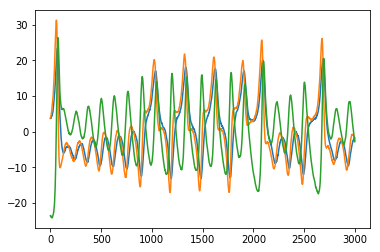

In [37]:
plt.plot(X)

In [38]:
from lvl.factor_models import PoissonMF

model = PoissonMF(n_components=3)
model.fit(data)

100%|██████████| 100/100 [00:34<00:00,  2.98it/s]


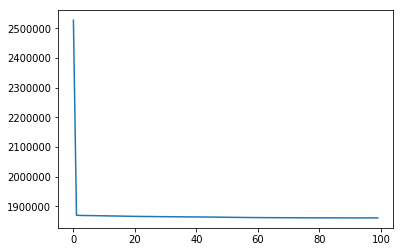

In [42]:
plt.plot(model.loss_hist)

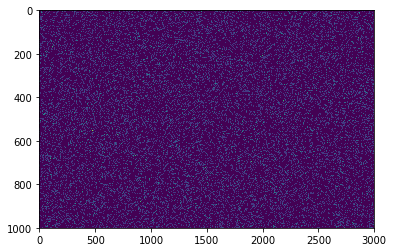

In [39]:
srt_data = data[:, np.lexsort(W)]

plt.imshow(srt_data.T, aspect='auto')

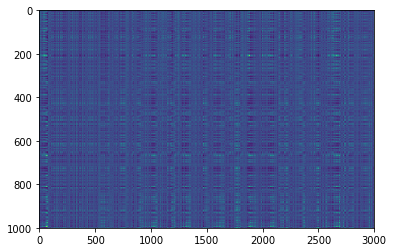

In [40]:
srt_pred = model.predict()[:, np.lexsort(W)]

plt.imshow(srt_pred.T, aspect='auto')

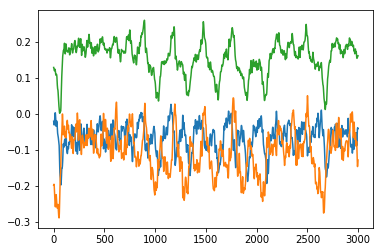

In [46]:
from scipy.ndimage import gaussian_filter1d
plt.plot(gaussian_filter1d(model.factors[0], 3.0, axis=0))

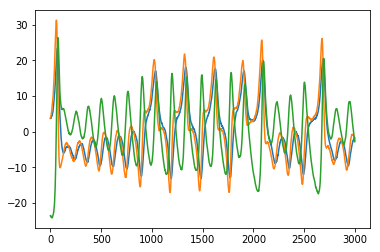

In [47]:
plt.plot(X)